# Customer Churn 

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
del df['customerID']

 **Quick EDA using sweetviz**

In [6]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(df)


                                             |      | [  0%]   00:00 -> (? left)

In [7]:
sweet_report.show_html('sweet_report.html')


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Churn
No       5174
Yes      1869
dtype: int64


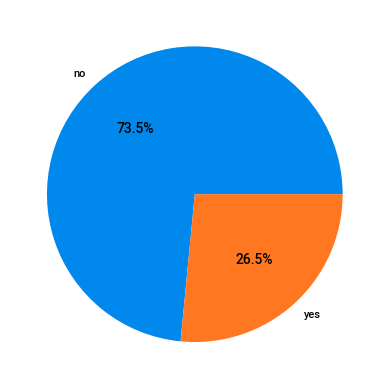

In [8]:
print(df.value_counts(['Churn']))
plt.pie(df.value_counts(['Churn']),labels=['no','yes'],autopct='%.1f%%')
plt.show()

In [9]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [10]:
df.shape

(7043, 20)

In [11]:
df1 = df[df['TotalCharges'] != ' ']


In [12]:
df1.shape

(7032, 20)

In [13]:
df1['TotalCharges'] = df1['TotalCharges'].astype('float')

In [14]:
df1['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [15]:
obj_col = df1.select_dtypes('object').columns

In [16]:
for col in obj_col:
    print(col,':',df[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace=True)
df1.replace('DSL','Yes',inplace=True)
df1.replace('Fiber optic','Yes',inplace=True)

In [18]:
col = list(obj_col)

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df1[col] = df1[col].apply(le.fit_transform)

In [21]:
col_scale = ['tenure', 'MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[col_scale] = scaler.fit_transform(df1[col_scale])

In [22]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,1,0,1,0,0,0,0,0,1,2,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,1,1,0,1,0,0,0,1,0,3,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,1,1,1,0,0,0,0,0,1,3,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,1,1,0,1,1,0,0,1,0,0,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.323944,1,1,1,1,0,1,1,1,1,1,1,3,0.662189,0.227521,0
7039,0,0,1,1,1.000000,1,1,1,0,1,1,0,1,1,1,1,1,0.845274,0.847461,0
7040,0,0,1,1,0.140845,0,0,1,1,0,0,0,0,0,0,1,2,0.112935,0.037809,0
7041,1,1,1,0,0.042254,1,1,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210,1


In [23]:
df1.DeviceProtection.value_counts()

0    4614
1    2418
Name: DeviceProtection, dtype: int64

In [24]:
X = df1.drop('Churn', axis = 1)
y = df1['Churn']

In [25]:
X.shape,y.shape

((7032, 19), (7032,))

In [26]:
# Selecting Features using selectkbest gives best features based on chi-square test

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [28]:
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(6,'Score'))

          Features        Score
14        Contract  1111.759054
4           tenure   238.007569
8   OnlineSecurity   147.165601
11     TechSupport   135.439602
1    SeniorCitizen   133.482766
3       Dependents   131.271509


In [29]:
X_new= df1[['Contract','OnlineSecurity','TechSupport','tenure','OnlineBackup','MonthlyCharges']].values

In [30]:
X_new.shape

(7032, 6)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size = 0.3,random_state = 35,stratify=y)

In [32]:
# since the target(Churn) is imbalanced,it may not be a generalized model,so we're using SMOTE Upsampling to balance the data

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy = 'minority')
X_train_, y_train_ = sm.fit_resample(X_train, y_train)

In [34]:
X_train_.shape,y_train_.shape

((7228, 6), (7228,))

In [35]:
y_train_.value_counts()

0    3614
1    3614
Name: Churn, dtype: int64

In [36]:
import dabl
aml = dabl.SimpleClassifier(random_state = 42)


In [37]:
aml.fit(X_train_,y_train_)

Running DummyClassifier()
accuracy: 0.500 average_precision: 0.500 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.333
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.500 average_precision: 0.500 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.333

Running GaussianNB()
accuracy: 0.732 average_precision: 0.792 roc_auc: 0.805 recall_macro: 0.732 f1_macro: 0.730
=== new best GaussianNB() (using recall_macro):
accuracy: 0.732 average_precision: 0.792 roc_auc: 0.805 recall_macro: 0.732 f1_macro: 0.730

Running MultinomialNB()
accuracy: 0.737 average_precision: 0.759 roc_auc: 0.801 recall_macro: 0.737 f1_macro: 0.734
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.737 average_precision: 0.759 roc_auc: 0.801 recall_macro: 0.737 f1_macro: 0.734

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.726 average_precision: 0.652 roc_auc: 0.726 recall_macro: 0.726 f1_macro: 0.719
Running DecisionTreeClassifier(class_weight='balanced', max_d

SimpleClassifier(random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5,class_weight = 'balanced')
dt.fit(X_train_,y_train_)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [39]:
from sklearn.ensemble import AdaBoostClassifier
adb  = AdaBoostClassifier(dt)
adb.fit(X_train_,y_train_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=5))

In [40]:
y_pred_ml = adb.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred_ml))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1549
           1       0.53      0.62      0.57       561

    accuracy                           0.75      2110
   macro avg       0.69      0.71      0.70      2110
weighted avg       0.77      0.75      0.76      2110



In [42]:
import tensorflow as tf

Init Plugin
Init Graph Optimizer
Init Kernel


**Build a neural network model in tensorflow/keras**

In [43]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

In [44]:
model = Sequential()
model.add(Dense(6, input_shape=(6,), activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(14, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Metal device set to: Apple M1


2023-01-30 10:55:39.372657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-30 10:55:39.373024: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [45]:
model.fit(X_train_, y_train_, epochs=25,validation_split= 0.2)

2023-01-30 10:55:40.525453: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-30 10:55:40.528304: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/25


2023-01-30 10:55:40.983992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


181/181 [==============================] - ETA: 0s - loss: 0.5807 - accuracy: 0.6856

2023-01-30 10:55:51.361002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


181/181 [==============================] - 11s 32ms/step - loss: 0.5807 - accuracy: 0.6856 - val_loss: 0.8029 - val_accuracy: 0.3914
Epoch 2/25
181/181 [==============================] - 5s 27ms/step - loss: 0.5103 - accuracy: 0.7324 - val_loss: 0.7502 - val_accuracy: 0.5270
Epoch 3/25
181/181 [==============================] - 5s 27ms/step - loss: 0.5023 - accuracy: 0.7326 - val_loss: 0.7227 - val_accuracy: 0.6065
Epoch 4/25
181/181 [==============================] - 5s 26ms/step - loss: 0.5017 - accuracy: 0.7382 - val_loss: 0.6237 - val_accuracy: 0.6639
Epoch 5/25
181/181 [==============================] - 5s 26ms/step - loss: 0.5057 - accuracy: 0.7328 - val_loss: 0.6773 - val_accuracy: 0.6515
Epoch 6/25
181/181 [==============================] - 5s 26ms/step - loss: 0.4968 - accuracy: 0.7368 - val_loss: 0.6591 - val_accuracy: 0.6321
Epoch 7/25
181/181 [==============================] - 5s 26ms/step - loss: 0.5022 - accuracy: 0.7373 - val_loss: 0.7095 - val_accuracy: 0.5934
Epoch 8/2

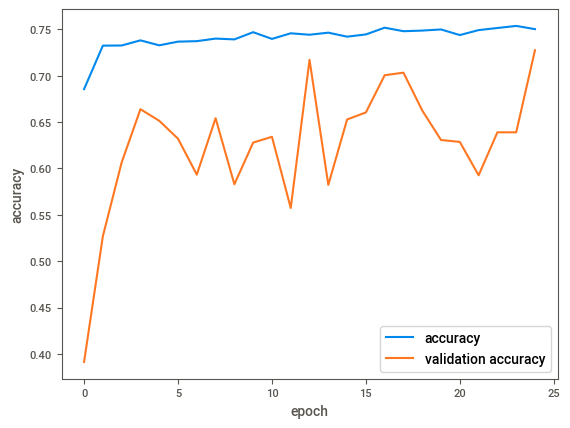

In [46]:

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'])

In [47]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 6ms/step - loss: 0.4350 - accuracy: 0.7900


[0.43498632311820984, 0.7900474071502686]

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 18)                126       
_________________________________________________________________
batch_normalization (BatchNo (None, 18)                72        
_________________________________________________________________
dense_2 (Dense)              (None, 14)                266       
_________________________________________________________________
batch_normalization_1 (Batch (None, 14)                56        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 577
Trainable params: 513
Non-trainable params: 64
_________________________________________________________

In [49]:
yp= model.predict(X_test)

2023-01-30 10:57:46.966035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [50]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [51]:
len(y_pred)

2110

In [52]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1549
           1       0.58      0.76      0.66       561

    accuracy                           0.79      2110
   macro avg       0.74      0.78      0.75      2110
weighted avg       0.82      0.79      0.80      2110

